# PHY4268 Tutorial2 - Qiskit Qubit Hamiltonian ( Acquis de lecture)

1. **F. Z. ATSAFACK FOUELEFACK**, zita.atsafack@facsciences-uy1.cm
    * Department of Physics, Faculty of Science, University of Yaounde I

### problème de structure electronique

Utilisons le driver PySCF pour la construction d'un opérateur Hamiltonien fermionique de la molécule Thiazole


In [3]:
pip install qiskit-nature[pyscf] -U

  Using cached qiskit_nature-0.7.2-py3-none-any.whl.metadata (8.0 kB)
  Using cached qiskit-1.1.0-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached qiskit_algorithms-0.3.0-py3-none-any.whl.metadata (4.2 kB)
  Using cached rustworkx-0.14.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10.0 kB)
  Using cached stevedore-5.2.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached symengine-0.11.0-cp311-cp311-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (1.2 kB)
  Using cached pbr-6.0.0-py2.py3-none-any.whl.metadata (1.3 kB)
Using cached qiskit-1.1.0-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
Using cached qiskit_algorithms-0.3.0-py3-none-any.whl (308 kB)
Using cached rustworkx-0.14.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
Using cached qiskit_nature-0.7.2-py3-none-any.whl (2.2 MB)
Using cached stevedore-5.2.0-py3-none-any.whl (49 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
try:
    import qiskit_nature
except:
    %pip install qiskit-nature[pyscf] -U
    import qiskit_nature
    
qiskit_nature.__version__

  Using cached qiskit_nature-0.7.2-py3-none-any.whl.metadata (8.0 kB)
  Using cached qiskit-1.1.0-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached qiskit_algorithms-0.3.0-py3-none-any.whl.metadata (4.2 kB)
  Using cached rustworkx-0.14.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10.0 kB)
  Using cached stevedore-5.2.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached symengine-0.11.0-cp311-cp311-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (1.2 kB)
  Using cached pbr-6.0.0-py2.py3-none-any.whl.metadata (1.3 kB)
Using cached qiskit-1.1.0-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
Using cached qiskit_algorithms-0.3.0-py3-none-any.whl (308 kB)
Using cached rustworkx-0.14.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
Using cached qiskit_nature-0.7.2-py3-none-any.whl (2.2 MB)
Using cached stevedore-5.2.0-py3-none-any.whl (49 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

'0.7.2'

In [1]:
import qiskit_nature
from rdkit import Chem
from pathlib import Path 

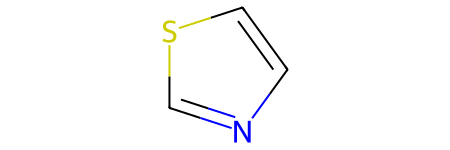

In [2]:
smile='C1=CSC=N1'
smi_key='Thiazole'
mol_rdkit = Chem.MolFromSmiles(smile)
mol_rdkit

### Quelques propriétes moleculaires
 On utilise le module **Descriptors** qui  fournit un ensemble de fonctions pour calculer diverses propriétés moléculaires (Respectivement: \
 Masse moléculaire avec la fonction **ExactMolwt**,\
Masse moléculaire moyenne avec la fonction **HeavyAtomMolWt**,\
Polarité avec la fonction **TPSA**,\
Solubilité avec la fonction **MolLogP**

In [3]:
from rdkit.Chem import Descriptors

print(f'Some molecular properties are :\
      \n Molecular weight={Descriptors.ExactMolWt(mol_rdkit)},\
      \n Average molecular weight={Descriptors.HeavyAtomMolWt(mol_rdkit)},\
      \n Polarity={Descriptors.TPSA(mol_rdkit)},\                                         
      \n Solubility={Descriptors.MolLogP(mol_rdkit)}')


SyntaxError: unterminated string literal (detected at line 6) (3334077286.py, line 3)

### Visualiation  3D de la molécule avec le logiciel 'py3Dmol'

In [4]:
 import py3Dmol 

In [5]:

def view3D(mol, label, fmt='mol'):
        """3D vizualisation of mol/xyz file with Py3DMol
        """

        view = py3Dmol.view(width=400, height=400)       # visualiser la molécule avec une largeur de ''400'' et hauteur de ''400''

        if fmt=='mol':                                   # si le format des 'mol',
            view.addModel(Chem.MolToMolBlock(mol), fmt)     # generer les coordonnes de a molecule dans un block
            # view.addModel(mol, fmt)
        elif fmt=='xyz':                                      # sinon 
            view.addModel(mol, fmt)                             # generer les coordonnes en xyz

        view.setStyle({'stick': {}, 'sphere': {'scale': .30}})     # définir le style de représentation de la molécule, avec des bâtons pour les liaisons et des sphères pour les atomes avec une échelle de '30'
        view.addLabel(label, {'position': {'x': -2, 'y': -3, 'z': 0}}) # ajouter une etiquette de visualisation dont les coordonnées sont x,y,z

        view.zoomTo()
        view.show()

Meilleur conformere de la molecule

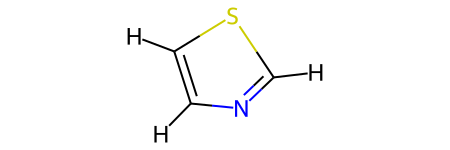

In [6]:
from rdkit.Chem import AllChem

# Add explicit Hs
mol_rdkit = Chem.AddHs(mol_rdkit)    #   Ajouter les atomes d'hydrogene a la molécule

# Generates the initial 3D conformation of the molecule
AllChem.EmbedMolecule(mol_rdkit)
mol_rdkit

Molecule 3D

In [7]:

# 3D visualization
mol_rdkit0 = mol_rdkit                    #crée une nouvelle variable mol_rdkit0 qui est une copie de mol_rdkit.
                                           #Cette copie est nécessaire pour la visualisation 3D, car la fonction view3D() modifie l'objet molécule passé en argument.

view3D(mol_rdkit0, f'{smi_key} RDKit Molecule')


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Coordonnées XYZ de la molécule a partir de la fonction 'MolToXYZBlock'

In [8]:
# Convert RDKit molecule to XYZ format 
mol_xyz0 = Chem.MolToXYZBlock(mol_rdkit)    # Convertir  la molecule format XYZ 
print(mol_xyz0)

8

C     -0.629972   -0.732056    0.014525
C     -1.054678    0.601653    0.016497
S      0.436004    1.515214    0.226338
C      1.492643   -0.063002    0.288846
N      0.662480   -0.858628    0.160870
H     -1.396102   -1.516840   -0.105550
H     -2.082068    0.989155   -0.088716
H      2.571693    0.064503    0.420074



Preoptimisation de la structure 3D de la molécule avec le champ de force  **MMFF94** de rdkit

In [9]:
from rdkit.Chem import AllChem

# Optimizes the 3D conformation of the molecule using MMFF - Merck Molecular Force Field
AllChem.MMFFOptimizeMolecule(mol_rdkit, maxIters=200, mmffVariant="MMFF94s")   # utiliser 200 itérations et la variante MMFF94s

#Canonicalize the orientation of the conformation
Chem.rdMolTransforms.CanonicalizeMol(mol_rdkit, normalizeCovar=True, ignoreHs=False)

# 3D visualization
mol_rdkit1 = mol_rdkit
view3D(mol_rdkit1, f'{smi_key} RDKit Molecule MMFF94')


3Dmol.js failed to load for some reason. Please check your browser console for error messages.



Chem.rdMolTransforms.CanonicalizeMol(mol_rdkit, normalizeCovar=True, ignoreHs=False) :

    *Cette ligne canonicalise l'orientation de la conformation 3D de la molécule mol_rdkit.\
    *La canonicalisation aligne la molécule de manière standard, ce qui facilitera les comparaisons et les analyses ultérieures.\
    *L'argument **normalizeCovar=True** indique que les coordonnées doivent être normalisées.\
    *L'argument **ignoreHs=False** indique que les atomes d'hydrogène doivent être pris en compte dans la canonicalisation.\



In [10]:
# Convert RDKit molecule to XYZ format 
mol_xyz0 = Chem.MolToXYZBlock(mol_rdkit)    # Convertir  la molecule format XYZ 
print(mol_xyz0)

8

C     -0.691649   -0.720224   -0.000001
C     -0.954693    0.633220    0.000000
S      0.520142    1.509220   -0.000003
C      1.377142    0.022332    0.000002
N      0.644690   -1.070005    0.000002
H     -1.442497   -1.501087   -0.000002
H     -1.912037    1.133607    0.000002
H      2.458901   -0.007063   -0.000001



Suppression des 2 premieres lignes du resultat xyz

In [11]:


# Remove the first two lines (number of atoms and empty line) from XYZ data
mol_xyz1 = '\n'.join(mol_xyz0.strip().split('\n')[2:])

# Check that the xyz file is valide for the next step (pyscf.gto)
print(mol_xyz1)

C     -0.691649   -0.720224   -0.000001
C     -0.954693    0.633220    0.000000
S      0.520142    1.509220   -0.000003
C      1.377142    0.022332    0.000002
N      0.644690   -1.070005    0.000002
H     -1.442497   -1.501087   -0.000002
H     -1.912037    1.133607    0.000002
H      2.458901   -0.007063   -0.000001


In [12]:
from qiskit_nature.second_q.drivers import PySCFDriver # Nous travaillons avec le driver PySCF

# Renseigner la structure de la molécule 
Thiazole_driver = PySCFDriver(
    atom=mol_xyz1, #Coordonnées xyz Thiazole
    basis='3-21G', #'def2-SVP', # Ensemble de base
)
Thiazole_problem = Thiazole_driver.run() 

In [13]:
print(f'Molecule strcuture: {Thiazole_problem.molecule}')
print(f'Reference energy (HF): {Thiazole_problem.reference_energy}')
print(f'Nuclear repulsion energy: {Thiazole_problem.nuclear_repulsion_energy}')
print(f"Hydrogen molecule, basis: {Thiazole_driver.basis}, Hartree-Fock calculation")
print(f"Number of alpha electrons: {Thiazole_problem.num_alpha}")
print(f"Number of beta electrons: {Thiazole_problem.num_beta}")
print(f"Number of spin orbitals: {Thiazole_problem.num_spin_orbitals}")
print(f"spin orbitals occupation: {Thiazole_problem.orbital_occupations}")
print(f"Spin orbitals energies: {Thiazole_problem.orbital_energies}")

Molecule strcuture: Molecule:
	Multiplicity: 1
	Charge: 0
	Unit: Bohr
	Geometry:
		C	(-1.3070271843293004, -1.3610261083387472, -1.8897261245650618e-06)
		C	(-1.8041083030393925, 1.1966123765970884, 0.0)
		S	(0.9829259258835203, 2.8520124617160825, -5.6691783736951854e-06)
		C	(2.6024212146357786, 0.04220136381378696, 3.7794522491301236e-06)
		N	(1.2182875352458498, -2.022016401915239, 3.7794522491301236e-06)
		H	(-2.7259242655067277, -2.836643319144995, -3.7794522491301236e-06)
		H	(-3.6132262700350073, 2.1422067628898263, 3.7794522491301236e-06)
		H	(4.646649457419155, -0.013347135617803032, -1.8897261245650618e-06)
	Masses:
		C	12
		C	12
		S	32
		C	12
		N	14
		H	1
		H	1
		H	1
Reference energy (HF): -564.357253283117
Nuclear repulsion energy: 204.83945839928373
Hydrogen molecule, basis: 3-21G, Hartree-Fock calculation
Number of alpha electrons: 22
Number of beta electrons: 22
Number of spin orbitals: 110
spin orbitals occupation: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

### Quel est l'interet de convertir en ev  ?

In [14]:
# Fermi Level and properties
from pyscf.data import nist  #  on importe le module nist (de pyscf.data) qui contient des constantes permettant de convertir,  des (au) en (eV)
au2ev = nist.HARTREE2EV       

print(f"HOMO and LUMO index are {Thiazole_problem.num_alpha-1, Thiazole_problem.num_alpha}")
print(f"HOMO and LUMO energies in eV are {Thiazole_problem.orbital_energies[Thiazole_problem.num_alpha-1],Thiazole_problem.orbital_energies[Thiazole_problem.num_alpha] * au2ev}")
print(f"HOMO-LUMO gap in eV is {abs(Thiazole_problem.orbital_energies[Thiazole_problem.num_alpha-1]-Thiazole_problem.orbital_energies[Thiazole_problem.num_alpha]) * au2ev}")

HOMO and LUMO index are (21, 22)
HOMO and LUMO energies in eV are (-0.3543172354557707, 3.0220757761842574)
HOMO-LUMO gap in eV is 12.663538843710464


Définition d'une espace actif autour de la molécule

In [15]:
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer
Thiazole_problem = ActiveSpaceTransformer(4, 4).transform(Thiazole_problem) # on reduit l'espace à 4 electrons et 4 orbitales spatiales
                                                                              # Utiliser (2,2) pour rendre le calcul moins couteux (+perte précision)Thiazole_problem.num_particles
Thiazole_problem.num_particles  # on  affiche le nombre de particules  dans le système Thiazole après la transformation de l'espace actif

(2, 2)

### Hamiltonien fermionique du Thiazole
 On recupère le hamiltonien obtenu a partie du probleme et on le stocque dans la variable 'Thiazole_hamiltonian'\
 par suite on le transforme en hamiltonien fermionique  de seconde quantification

In [16]:
Thiazole_hamiltonian = Thiazole_problem.hamiltonian # Hamiltonien en 1ere quantification
Thiazole_fermionic_op = Thiazole_hamiltonian.second_q_op() # Hamiltonien fermionique

In [17]:
if len(Thiazole_fermionic_op) <= 20:                                            #Si l'operateur fermionique respecte la condition, l'afficher 
                                                                           # sinon afficher les 20 premiers termes et le reste sous forme de [...]
    print(Thiazole_fermionic_op)                                       
else: # print the first 20 terms of the fermionic Hamiltonian operator of the molecule
    print("\n".join(str(Thiazole_fermionic_op).splitlines()[:22] + ["..."]))


Fermionic Operator
number spin orbitals=8, number terms=1008
  -1.2713868842233054 * ( +_0 -_0 )
+ -0.004465442438972509 * ( +_0 -_1 )
+ -0.031113951367382712 * ( +_0 -_2 )
+ 6.153220735300184e-08 * ( +_0 -_3 )
+ -0.004465442438971538 * ( +_1 -_0 )
+ -1.2269101336919241 * ( +_1 -_1 )
+ -0.0009665020454103293 * ( +_1 -_2 )
+ -7.163305664189341e-08 * ( +_1 -_3 )
+ -0.031113951367382046 * ( +_2 -_0 )
+ -0.0009665020454077203 * ( +_2 -_1 )
+ -0.9651465174530686 * ( +_2 -_2 )
+ -7.938235437661846e-08 * ( +_2 -_3 )
+ 6.153220735302682e-08 * ( +_3 -_0 )
+ -7.16330566419348e-08 * ( +_3 -_1 )
+ -7.938235437665319e-08 * ( +_3 -_2 )
+ -0.8690186104129077 * ( +_3 -_3 )
+ -1.2713868842233054 * ( +_4 -_4 )
+ -0.004465442438972509 * ( +_4 -_5 )
+ -0.031113951367382712 * ( +_4 -_6 )
+ 6.153220735300184e-08 * ( +_4 -_7 )
...


In [18]:
Thiazole_particle_number_op = Thiazole_problem.properties.particle_number.second_q_ops()["ParticleNumber"]
print(Thiazole_particle_number_op)   # on  affiche l'opérateur de nombre de particules dans la représentation de seconde quantification.

Fermionic Operator
number spin orbitals=8, number terms=8
  1.0 * ( +_0 -_0 )
+ 1.0 * ( +_1 -_1 )
+ 1.0 * ( +_2 -_2 )
+ 1.0 * ( +_3 -_3 )
+ 1.0 * ( +_4 -_4 )
+ 1.0 * ( +_5 -_5 )
+ 1.0 * ( +_6 -_6 )
+ 1.0 * ( +_7 -_7 )


In [19]:
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.operators import FermionicOp

Définissons une fonction `label_to_qubit()` pour convertir les opérateurs fermioniques en opérateurs qubits.

In [20]:
def label_to_qubit(label, mapper):
    """
    Conversion les opérateurs fermioniques en opérateurs qubits
    
    Args:
        label(dict): opérateur fermionique avec son coefficient
        mapper (Mapper): Qubit mapper
    
    Return:
        qubit_op (SparsePauliOp): opérateurs fermioniques avec les coefficients
    """
    
    f_op = FermionicOp(label)
    qubit_op = mapper.map(f_op)                      # On mappe l'operateur
    
    return qubit_op                                  # on retourne le resultat du mapping

On utilise la fonction definie ci dessus pour faire faire le mapping en utilisant la transformation de Jordan-Wigner 

In [21]:
for k in ({"+_0":1.0}, {"+_1":1.0}, {"+_2":1.0}, {"+_3":1.0}):
  qubit_op = label_to_qubit(k, JordanWignerMapper())            
  print(f"{k}:\n {qubit_op}\n")

{'+_0': 1.0}:
 SparsePauliOp(['X', 'Y'],
              coeffs=[0.5+0.j , 0. -0.5j])

{'+_1': 1.0}:
 SparsePauliOp(['XZ', 'YZ'],
              coeffs=[0.5+0.j , 0. -0.5j])

{'+_2': 1.0}:
 SparsePauliOp(['XZZ', 'YZZ'],
              coeffs=[0.5+0.j , 0. -0.5j])

{'+_3': 1.0}:
 SparsePauliOp(['XZZZ', 'YZZZ'],
              coeffs=[0.5+0.j , 0. -0.5j])



In [22]:
Thiazole_qubit_JW_op = JordanWignerMapper().map(Thiazole_fermionic_op) # on applique l'operateur de J-W à l'opérateur fermionic du Thiazole

print("Number of items in the JWT Pauli list:", len(Thiazole_qubit_JW_op),'\n')       # on afffiche le nombre d'opérateurs de pauli et on affiche une ligne apress l'affichage

if len(Thiazole_qubit_JW_op) <= 10:
    print(Thiazole_qubit_JW_op)
else:
    print(Thiazole_qubit_JW_op[0:10])

Number of items in the JWT Pauli list: 253 

SparsePauliOp(['IIIIIIII', 'IIIIIIIZ', 'IIIIIIYY', 'IIIIIIXX', 'IIIIIYZY', 'IIIIIXZX', 'IIIIYZZY', 'IIIIXZZX', 'IIIIIIZI', 'IIIIIYYI'],
              coeffs=[-2.41325602e+00+0.j,  1.47386598e-01+0.j, -4.15526717e-04+0.j,
 -4.15526717e-04+0.j, -2.09149290e-02+0.j, -2.09149290e-02+0.j,
  7.61621965e-08+0.j,  7.61621965e-08+0.j,  1.31059575e-01+0.j,
  5.71022042e-03+0.j])


In [23]:
Thiazole_qubit_JW_op.num_qubits
 ## Cette ligne accède au nombre de qubits nécessaires pour représenter les opérateurs de qubits dans la liste Thiazole_qubit_JW_op.

8

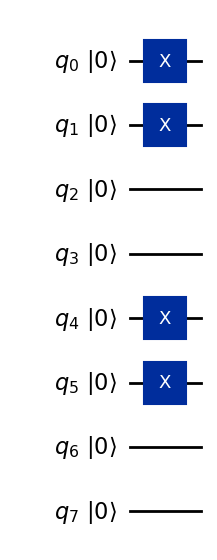

In [24]:
from qiskit_nature.second_q.circuit.library import HartreeFock

hf_state = HartreeFock(Thiazole_problem.num_spatial_orbitals, Thiazole_problem.num_particles, JordanWignerMapper())
hf_state.draw('mpl',initial_state=True)



    # On crée un objet hf_state représentant l'état de Hartree-Fock pour le problème "Thiazole".
   # Les arguments passés à la classe HartreeFock sont le nombre d'orbitales spatiales (Thiazole_problem.num_spatial_orbitals) et le nombre de particules (Thiazole_problem.num_particles).
   # Le JordanWignerMapper est à nouveau utilisé pour mapper les opérateurs fermioniques aux opérateurs de qubits pour l'état de Hartree-Fock.
   # La méthode draw('mpl',initial_state=True) génère une visualisation de l'état de Hartree-Fock en utilisant la bibliothèque Matplotlib.


In [28]:
help (PySCFDriver)


Help on class PySCFDriver in module qiskit_nature.second_q.drivers.pyscfd.pyscfdriver:

class PySCFDriver(qiskit_nature.second_q.drivers.electronic_structure_driver.ElectronicStructureDriver)
 |  PySCFDriver(atom: 'str | list[str]' = 'H 0.0 0.0 0.0; H 0.0 0.0 0.735', *, unit: 'DistanceUnit' = <DistanceUnit.ANGSTROM: 'Angstrom'>, charge: 'int' = 0, spin: 'int' = 0, basis: 'str' = 'sto3g', method: 'MethodType' = <MethodType.RHF: 'rhf'>, xc_functional: 'str' = 'lda,vwn', xcf_library: 'str' = 'libxc', conv_tol: 'float' = 1e-09, max_cycle: 'int' = 50, init_guess: 'InitialGuess' = <InitialGuess.MINAO: 'minao'>, max_memory: 'int | None' = None, chkfile: 'str | None' = None) -> 'None'
 |  
 |  A Second-Quantization driver for Qiskit Nature using the PySCF library.
 |  
 |  References:
 |      https://pyscf.org/
 |  
 |  Method resolution order:
 |      PySCFDriver
 |      qiskit_nature.second_q.drivers.electronic_structure_driver.ElectronicStructureDriver
 |      qiskit_nature.second_q.drivers